In [1]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [3]:
data_name = 'preventing_drowsy_controlled'

In [7]:
query = f'''select box_label as label, count(img_dir) as count from DeepInSight.{data_name}_box_info group by label;'''

In [8]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [9]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [10]:
df = df.sort_values(by='count',ascending=False)
df

,label,count
1,Face,181653
3,Leye_Open,133091
8,Reye_Open,126999
4,Mouth_Close,82483
5,Mouth_Open,44436
2,Leye_Close,43759
7,Reye_Close,39800
0,Cigar,20481
6,Phone,20201


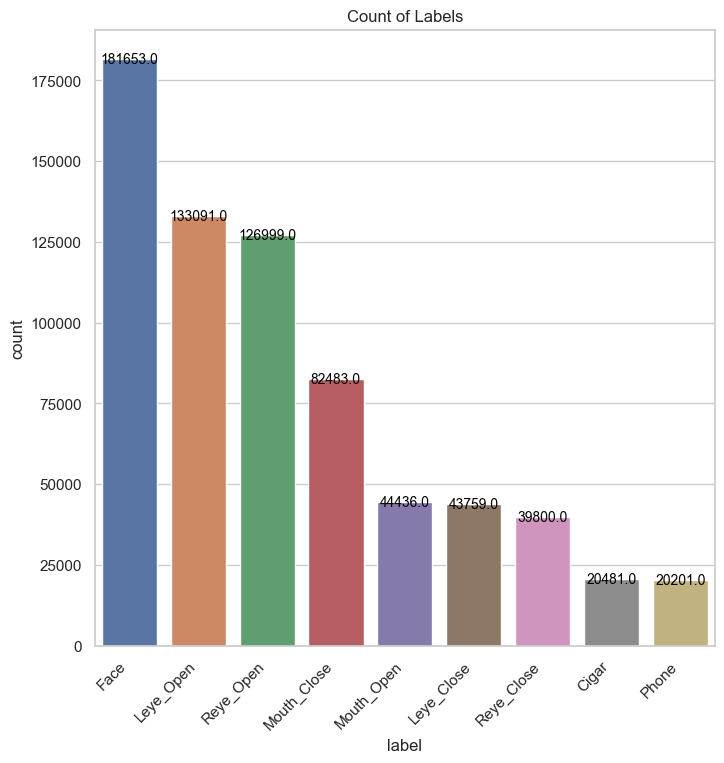

In [13]:
try:
    plt.figure(figsize=(8, 8))
    sns.set(style="whitegrid")
    plt.xticks(rotation=45, ha='right')
    ax = sns.barplot(x='label', y='count', data=df, hue='label')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)